In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix,accuracy_score

from keras.utils import np_utils
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [3]:
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [4]:
print(x_test.shape,y_test.shape)

(10000, 32, 32, 3) (10000, 1)


In [5]:
labels = ['Airplane','Automobile','Bird','Cat','Dear','Dog','Frog','Horse','Ship','Truck']

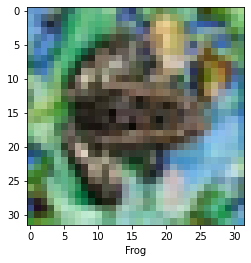

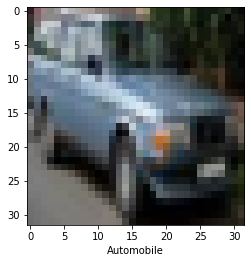

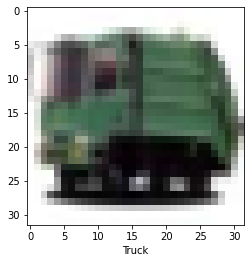

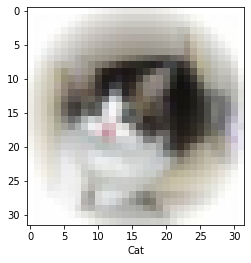

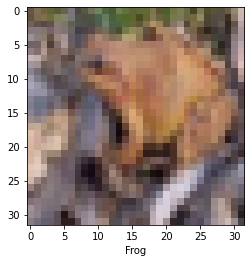

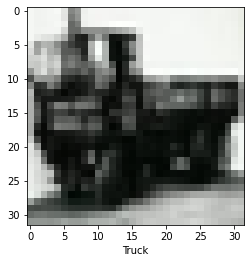

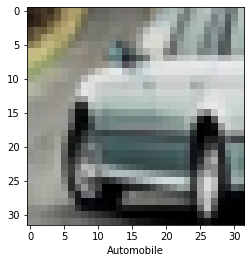

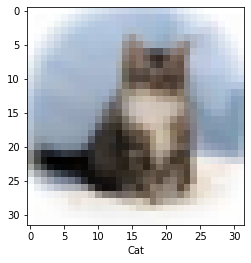

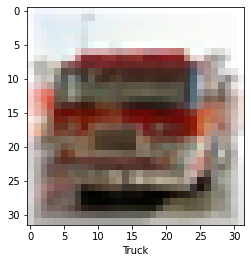

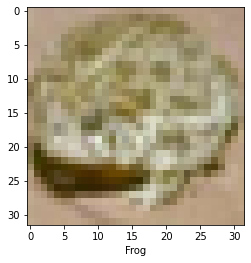

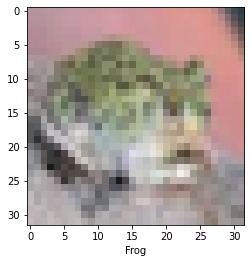

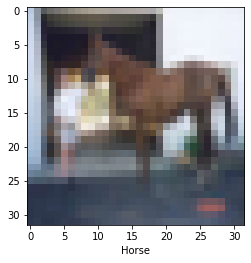

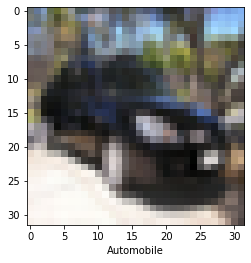

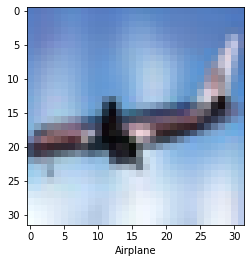

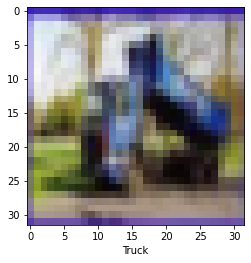

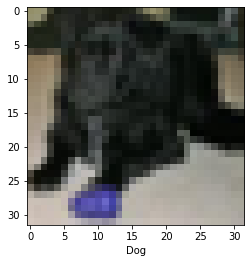

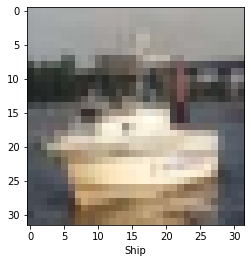

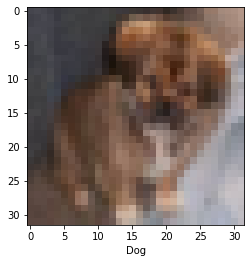

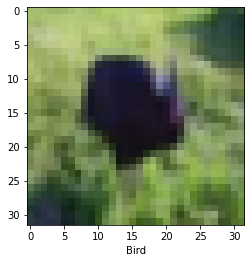

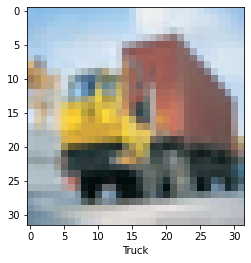

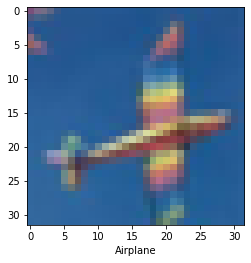

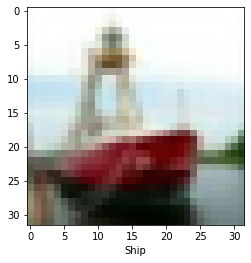

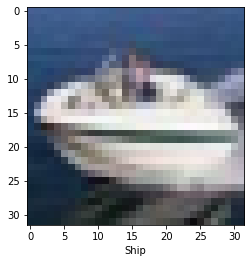

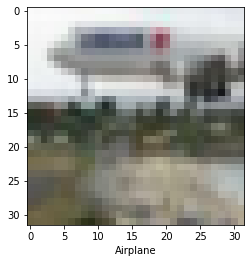

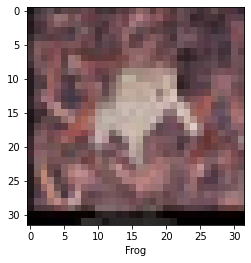

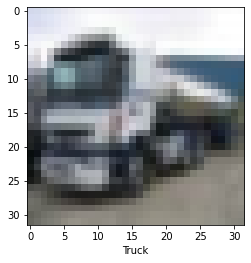

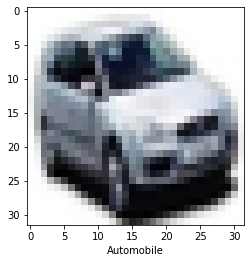

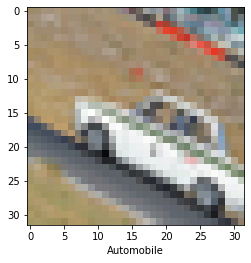

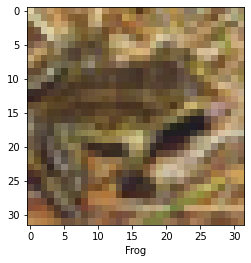

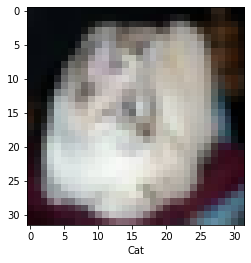

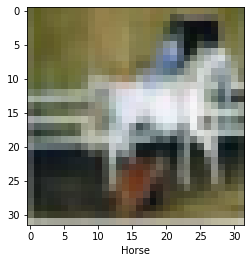

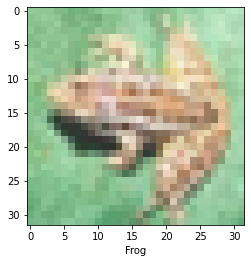

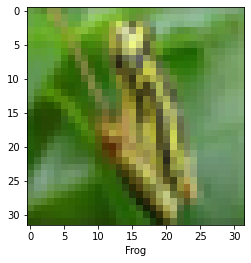

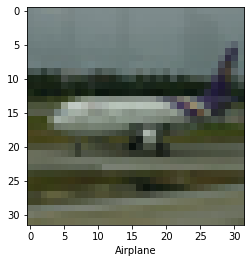

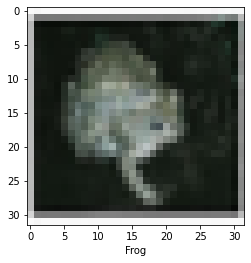

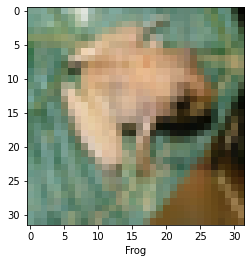

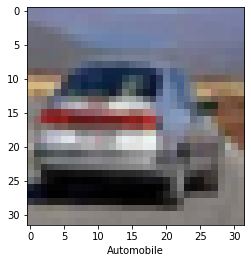

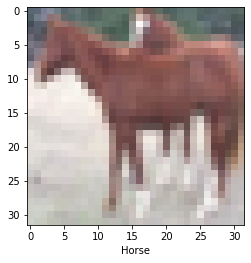

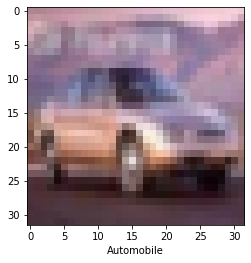

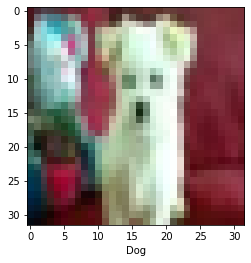

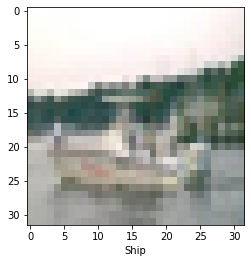

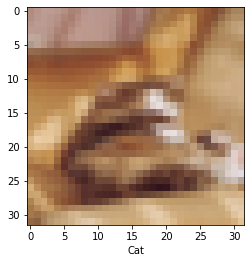

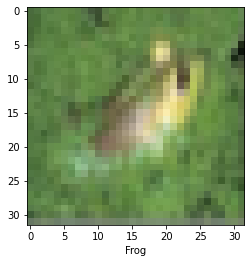

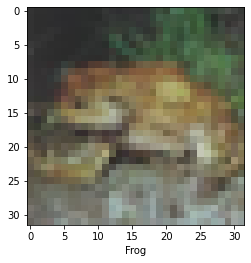

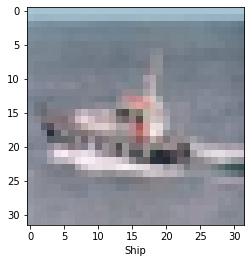

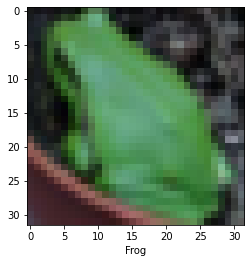

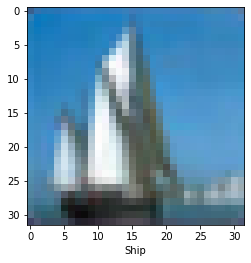

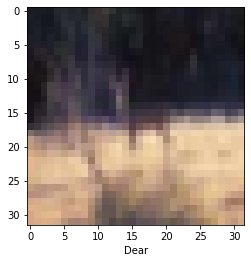

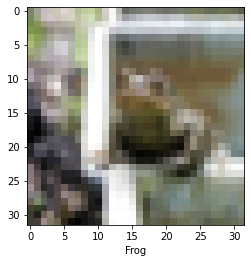

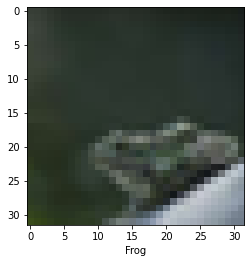

In [6]:

for i in range(200,250): 
    plt.imshow(x_train[i])
    plt.xlabel(labels[int(y_train[i])])
    plt.show()

In [7]:
# Let us normalize the x data

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
y_test = np_utils.to_categorical(y_test)
y_train = np_utils.to_categorical(y_train)

In [10]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## CNN model

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(8,(5,5),input_shape=(32,32,3))) #28x28x8
model.add(Conv2D(16,(5,5)))                       # 24X24X16
model.add(MaxPooling2D(pool_size=(2,2)))          # 12x12x16
model.add(Conv2D(32,(5,5)))                      # 8x8x32
model.add(MaxPooling2D(pool_size=(2,2)))          # 4x4x32
model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         608       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        3216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0

In [15]:
# Predictions from loaded model
model.compile(loss='categorical_crossentropy',
             optimizer='RMSprop',
             metrics=['accuracy'])

In [16]:
hist = model.fit(x_train,y_train,batch_size=1000,epochs=20)

Epoch 1/20
50/50 [==============================] - 28s 539ms/step - loss: 2.1282 - accuracy: 0.2274
Epoch 2/20
50/50 [==============================] - 26s 528ms/step - loss: 1.8434 - accuracy: 0.3436
Epoch 3/20
50/50 [==============================] - 27s 541ms/step - loss: 1.6822 - accuracy: 0.3961
Epoch 4/20
50/50 [==============================] - 27s 534ms/step - loss: 1.5764 - accuracy: 0.4344
Epoch 5/20
50/50 [==============================] - 27s 547ms/step - loss: 1.4999 - accuracy: 0.4652
Epoch 6/20
50/50 [==============================] - 27s 540ms/step - loss: 1.4361 - accuracy: 0.4888
Epoch 7/20
50/50 [==============================] - 27s 543ms/step - loss: 1.3913 - accuracy: 0.5044
Epoch 8/20
50/50 [==============================] - 27s 545ms/step - loss: 1.3365 - accuracy: 0.5264
Epoch 9/20
50/50 [==============================] - 27s 540ms/step - loss: 1.3043 - accuracy: 0.5404
Epoch 10/20
50/50 [==============================] - 29s 573ms/step - loss: 1.2686 - accura

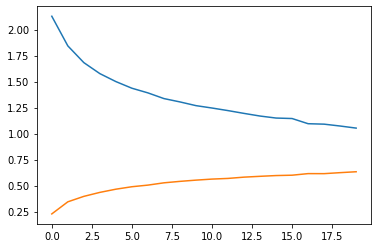

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

### Saving and loading the model

In [18]:
#model_json = model.to_json()

In [19]:
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)

In [20]:
#model.save_weights("model.h5")

### Loading the model

In [21]:
#json_file = open('model.json', 'r')

In [22]:
#loaded_model_json = json_file.read()

In [23]:
# model = model_from_json(loaded_model_json)

In [24]:
# model.load_weights("model.h5")

In [25]:
y_pred = model.predict(x_test)

In [26]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [27]:
y_pred_labels

[3,
 1,
 0,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 4,
 9,
 3,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 4,
 4,
 2,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 1,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 5,
 9,
 7,
 2,
 9,
 8,
 2,
 3,
 8,
 8,
 7,
 2,
 2,
 3,
 7,
 5,
 6,
 1,
 6,
 6,
 1,
 2,
 3,
 7,
 2,
 3,
 8,
 8,
 0,
 2,
 7,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 4,
 8,
 8,
 9,
 0,
 4,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 2,
 6,
 8,
 5,
 4,
 0,
 2,
 2,
 1,
 4,
 0,
 4,
 6,
 5,
 8,
 3,
 9,
 2,
 0,
 0,
 8,
 3,
 6,
 8,
 4,
 1,
 0,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 6,
 5,
 6,
 5,
 8,
 2,
 6,
 5,
 7,
 5,
 1,
 1,
 6,
 0,
 2,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 3,
 2,
 8,
 4,
 8,
 4,
 5,
 0,
 7,
 9,
 1,
 8,
 9,
 9,
 8,
 7,
 3,
 1,
 0,
 7,
 6,
 2,
 3,
 8,
 6,
 2,
 3,
 0,
 5,
 8,
 9,
 1,
 7,
 4,
 8,
 8,
 5,
 8,
 5,
 0,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 8,
 5,
 0,
 3,
 9,
 2,
 0,
 7,
 9,
 0,
 4,
 7,
 4,
 9,
 5,
 4,
 1,
 3,
 2,
 0,
 6,
 5,
 1,
 3,
 1,
 8,
 0,
 4,
 0,
 3,
 2,
 1,
 9,
 8,
 9,
 0,
 8,
 7,
 8,
 2,
 0,


In [28]:
y_test_labels = [np.argmax(i) for i in y_test]

In [29]:
y_test_labels

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [30]:
cm = confusion_matrix(y_test_labels,y_pred_labels)

In [31]:
accuracy_score(y_test_labels,y_pred_labels)

0.62

<AxesSubplot:>

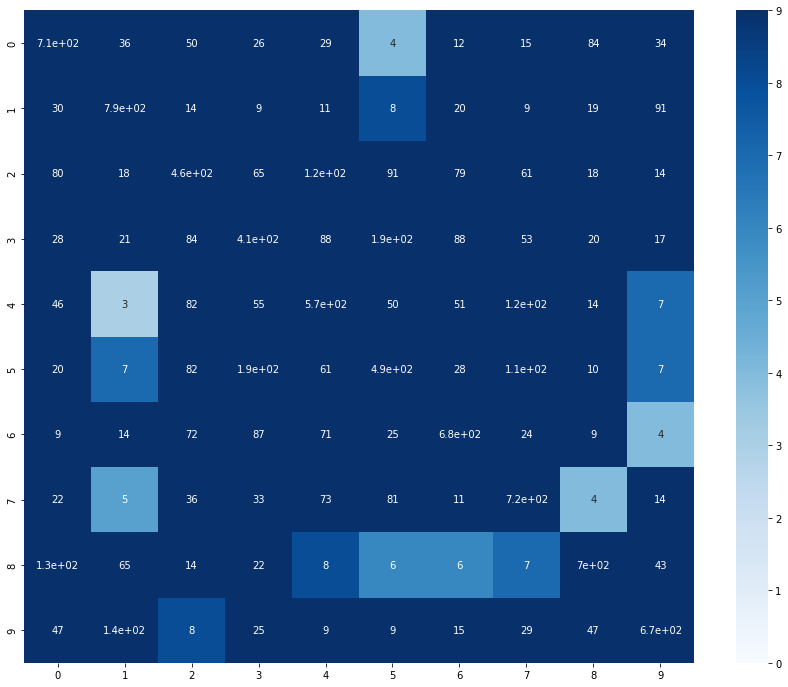

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(cm,annot=True,vmax=9,vmin=0,cmap='Blues')

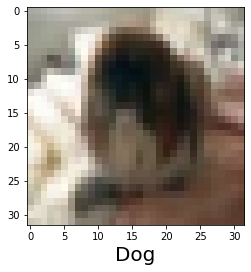

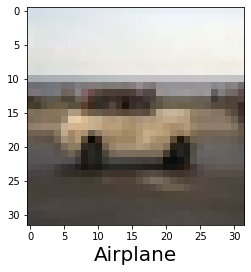

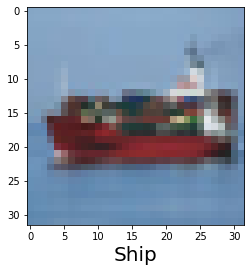

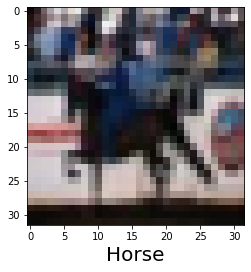

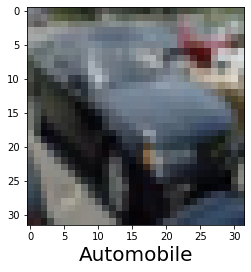

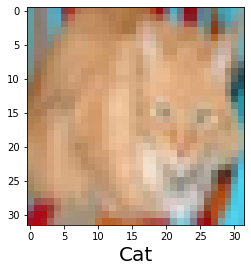

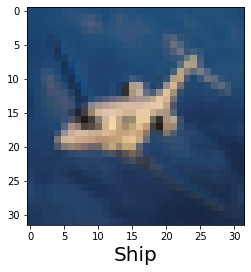

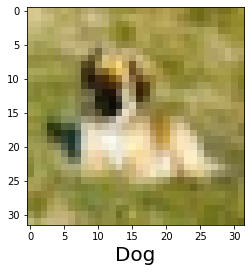

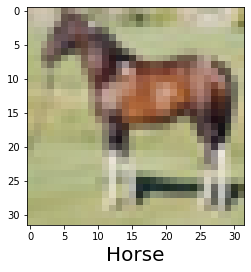

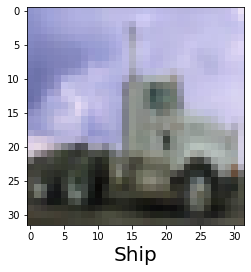

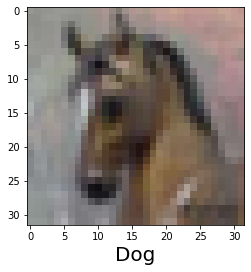

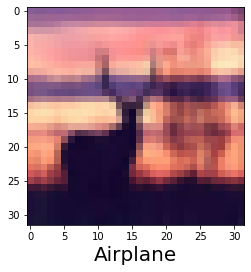

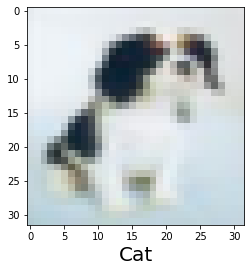

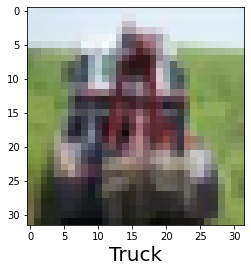

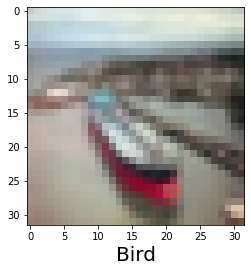

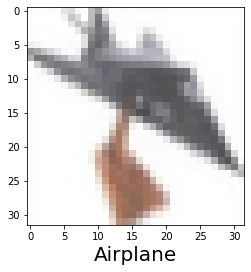

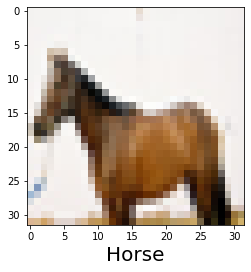

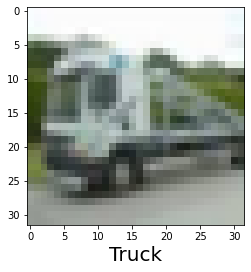

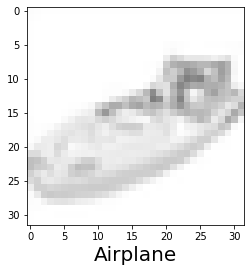

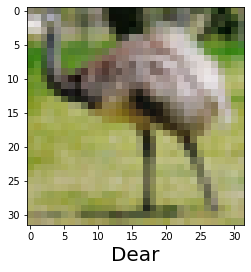

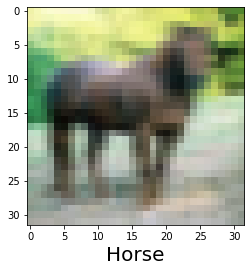

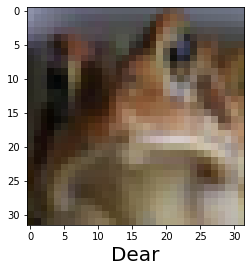

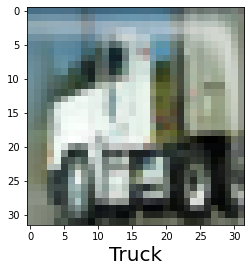

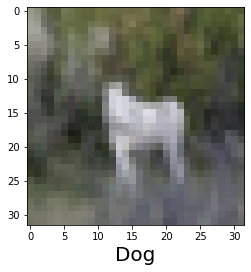

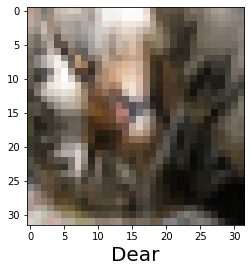

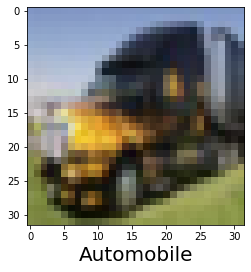

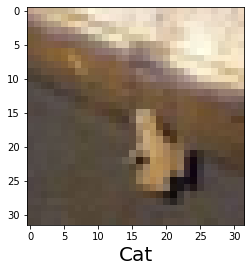

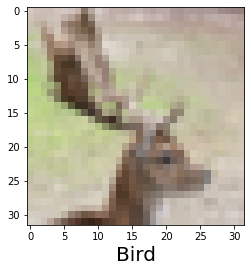

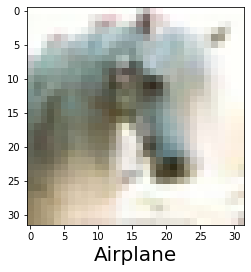

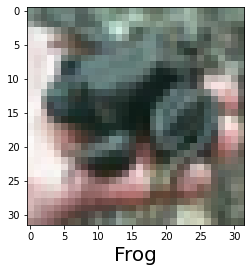

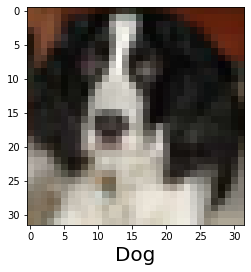

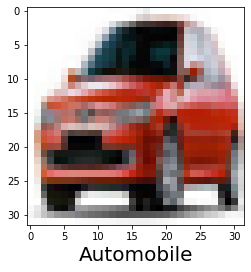

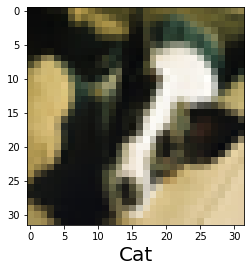

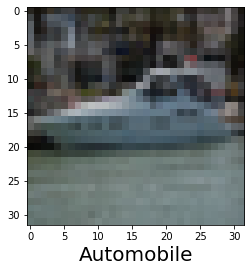

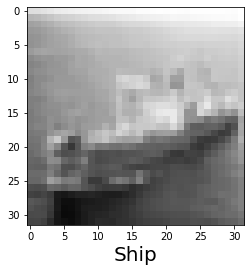

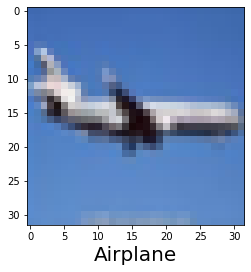

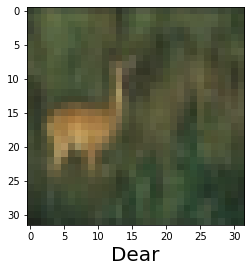

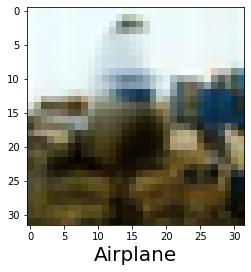

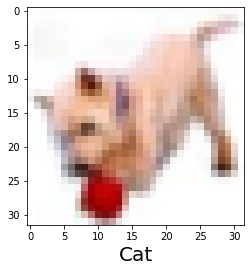

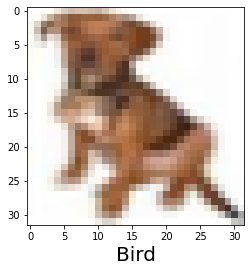

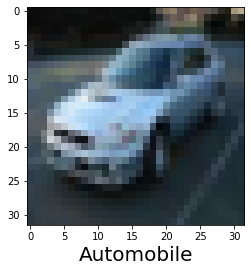

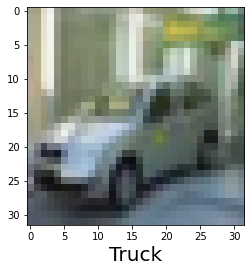

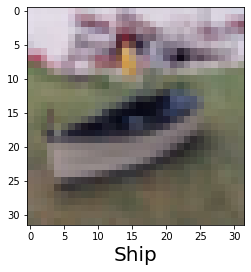

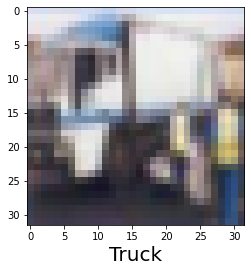

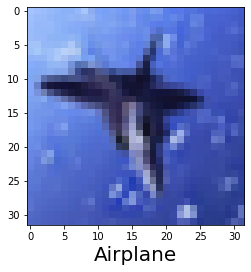

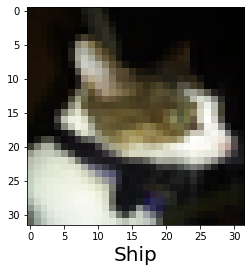

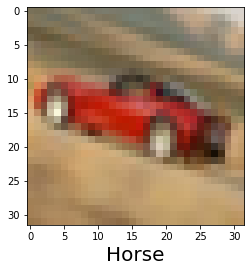

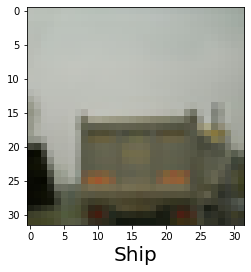

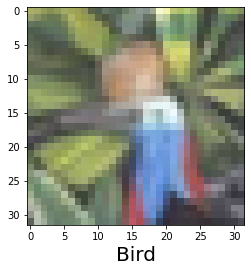

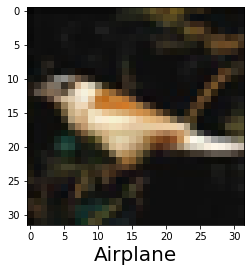

In [33]:
for i in range(200,250):   
    plt.imshow(x_test[i])
    plt.xlabel(labels[int(y_pred_labels[i])],fontsize=20)
    plt.show()